In [1]:
#import all required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading datasets 
df_train=pd.read_csv("loan-train.csv")
df_test=pd.read_csv("loan-test.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# checking shapes
df_train.shape,df_test.shape

((614, 13), (367, 12))

In [6]:
# describe 
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# checking for datatypes 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
# checking for null values
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# valuecount for column 
df_train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
# checking for unique content 
df_train["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
# working on replace null values
df_train["Gender"].replace(np.nan,"Male",inplace=True)

In [14]:
# checking for null values
df_train["Gender"].isnull().sum()

0

In [15]:
# valuecount for column 
df_test["Gender"].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [16]:
# checking for unique content 
df_test["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [17]:
# working on replace null values
df_test["Gender"].replace(np.nan,"Male",inplace=True)

In [18]:
# checking for null values
df_test["Gender"].isnull().sum()

0

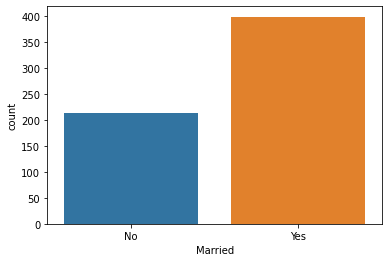

In [19]:
sns.countplot(df_train['Married']);

In [20]:
# valuecount for column 
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
# checking for unique content 
df_train["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
# working on replace null values
df_train["Married"].replace(np.nan,"Yes",inplace=True)

In [23]:
# checking for null values
df_train["Married"].isnull().sum()

0

In [24]:
# valuecount for column 
df_test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [25]:
# checking for unique content 
df_test["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
# working on replace null values
df_test["Married"].replace(np.nan,"Yes",inplace=True)

In [27]:
# checking for null values
df_test["Married"].isnull().sum()

0

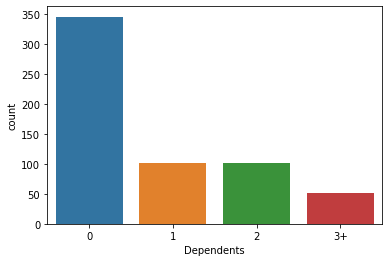

In [28]:
sns.countplot(df_train['Dependents']);

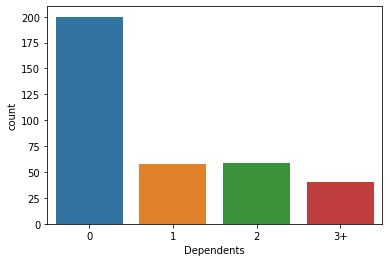

In [29]:
sns.countplot(df_test['Dependents']);

In [30]:
# checking for unique content 
df_train["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [31]:
# valuecount for column 
df_train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [32]:
# working on replace null values
df_train["Dependents"].replace(np.nan,"0",inplace=True)

In [33]:
df_train["Dependents"]=df_train["Dependents"].map(lambda x:x.rstrip("+"))

In [34]:
# valuecount for column 
df_train["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [35]:
df_train["Dependents"]=df_train["Dependents"].astype("int64")

In [36]:
df_train["Dependents"].dtypes

dtype('int64')

In [37]:
# checking for unique content 
df_test["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [38]:
# valuecount for column 
df_test["Dependents"].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [39]:
# working on replace null values
df_test["Dependents"].replace(np.nan,"0",inplace=True)

In [40]:
df_test["Dependents"]=df_test["Dependents"].map(lambda x:x.rstrip("+"))

In [41]:
# valuecount for column 
df_test["Dependents"].value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [42]:
df_test["Dependents"]=df_train["Dependents"].astype("int64")

In [43]:
df_test["Dependents"].dtypes

dtype('int64')

In [44]:
# checking for unique content 
df_train["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
# valuecount for column 
df_train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [46]:
# working on replace null values
df_train["Self_Employed"].replace(np.nan,"No",inplace=True)

In [47]:
# checking for null values
df_train["Self_Employed"].isnull().sum()

0

In [48]:
# checking for unique content 
df_test["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [49]:
# valuecount for column 
df_test["Self_Employed"].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [50]:
# working on replace null values
df_test["Self_Employed"].replace(np.nan,"No",inplace=True)

In [51]:
# checking for null values
df_test["Self_Employed"].isnull().sum()

0

In [52]:
# checking for unique content 
df_train["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [53]:
m=round(df_train["Loan_Amount_Term"].mean())

In [54]:
df_train["Loan_Amount_Term"].fillna(m,inplace=True)

In [55]:
# checking for null values
df_train["Loan_Amount_Term"].isnull().sum()

0

In [56]:
# checking for unique content 
df_test["Loan_Amount_Term"].unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [57]:
m=round(df_test["Loan_Amount_Term"].mean())

In [58]:
df_test["Loan_Amount_Term"].fillna(m,inplace=True)

In [59]:
# checking for null values
df_test["Loan_Amount_Term"].isnull().sum()

0

In [60]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [61]:
# valuecount for column 
df_train["Education"].value_counts() 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [62]:
# checking for unique content 
df_train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [63]:
# valuecount for column 
df_test["Education"].value_counts() 

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [64]:
# checking for unique content 
df_test["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [65]:
# checking for unique content 
df_train["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [66]:
# checking for unique content 
df_test["ApplicantIncome"].unique()

array([ 5720,  3076,  5000,  2340,  3276,  2165,  2226,  3881, 13633,
        2400,  3091,  2185,  4166, 12173,  4666,  5667,  4583,  3786,
        9226,  1300,  1888,  2083,  3909,  3765,  5400,     0,  4363,
        7500,  3772,  2942,  2478,  6250,  3268,  2783,  2740,  3150,
        7350,  2267,  5833,  3643,  5629,  3644,  1750,  6500,  3666,
        4260,  4163,  2356,  6792,  8000,  2419,  3500,  4116,  5293,
        2750,  4402,  3613,  2779,  4720,  2415,  7016,  4968,  2101,
        4490,  2917,  4700,  3445,  7666,  2458,  3250,  4463,  4083,
        3900,  4750,  3583,  3189,  6356,  3413,  7950,  3829, 72529,
        4136,  8449,  4456,  4635,  3571,  3066,  3235,  5058,  3188,
       13518,  4364,  4766,  4609,  6260,  3333,  9719,  6835,  4452,
        2262,  3901,  2687,  2243,  3417,  1596,  4513,  4500,  4523,
        4742,  4082,  2922,  4167,  4243,  1516,  1762,   724,  3125,
        2333,  3350,  2500, 12500,  4667,  3073,  3321,  3391,  3343,
        3620,  4000,

In [67]:
# checking for unique content 
df_train["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [68]:
m=round(df_train["LoanAmount"].mean())

In [69]:
df_train["LoanAmount"].fillna(m,inplace=True)

In [70]:
# checking for null values
df_train["LoanAmount"].isnull().sum()

0

In [71]:
# checking for unique content 
df_train["LoanAmount"].unique()

array([146., 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [72]:
# checking for unique content 
df_test["LoanAmount"].unique()

array([110., 126., 208., 100.,  78., 152.,  59., 147., 280., 123.,  90.,
       162.,  40., 166., 124., 131., 200., 300.,  48.,  28., 101., 125.,
       290., 148., 140., 275.,  57.,  75., 192., 158., 176., 185., 116.,
       138.,  84., 108., 187., 120., 160.,  30.,  92., 130., 134., 189.,
       135., 188.,  95.,  65., 139., 232., 144., 155., 186.,  50.,  nan,
       163., 360., 149., 257., 102.,  77., 390., 256.,  61., 107., 119.,
       165.,  93., 122., 157., 180.,  80., 104., 213., 146.,  71., 225.,
        70., 132., 105.,  83., 103., 150., 550., 260., 199., 113., 117.,
        72., 214., 133., 143., 209., 170.,  94.,  79., 159., 173., 235.,
       336.,  96., 128., 412., 114., 115.,  88.,  55., 118., 212.,  74.,
        66.,  64., 142., 151.,  81., 171., 234., 184., 112.,  49.,  99.,
       240., 460., 297., 106., 141., 145., 177.,  68., 183., 121., 153.,
        67., 181.,  35.,  46.,  87., 137., 254., 109., 197.,  85.,  60.,
        76.,  98.])

In [73]:
m=round(df_test["LoanAmount"].mean())

In [74]:
df_test["LoanAmount"].fillna(m,inplace=True)

In [75]:
# checking for null values
df_test["LoanAmount"].isnull().sum()

0

In [76]:
# checking for unique content 
df_test["LoanAmount"].unique()

array([110., 126., 208., 100.,  78., 152.,  59., 147., 280., 123.,  90.,
       162.,  40., 166., 124., 131., 200., 300.,  48.,  28., 101., 125.,
       290., 148., 140., 275.,  57.,  75., 192., 158., 176., 185., 116.,
       138.,  84., 108., 187., 120., 160.,  30.,  92., 130., 134., 189.,
       135., 188.,  95.,  65., 139., 232., 144., 155., 186.,  50., 136.,
       163., 360., 149., 257., 102.,  77., 390., 256.,  61., 107., 119.,
       165.,  93., 122., 157., 180.,  80., 104., 213., 146.,  71., 225.,
        70., 132., 105.,  83., 103., 150., 550., 260., 199., 113., 117.,
        72., 214., 133., 143., 209., 170.,  94.,  79., 159., 173., 235.,
       336.,  96., 128., 412., 114., 115.,  88.,  55., 118., 212.,  74.,
        66.,  64., 142., 151.,  81., 171., 234., 184., 112.,  49.,  99.,
       240., 460., 297., 106., 141., 145., 177.,  68., 183., 121., 153.,
        67., 181.,  35.,  46.,  87., 137., 254., 109., 197.,  85.,  60.,
        76.,  98.])

In [77]:
# checking for unique content 
df_train["Credit_History"].unique()

array([ 1.,  0., nan])

In [78]:
# valuecount for column 
df_train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [79]:
# working on replace null values
df_train["Credit_History"].replace(np.nan,"1.0",inplace=True)

In [80]:
# checking for null values
df_train["Credit_History"].isnull().sum()

0

In [81]:
# checking for unique content 
df_test["Credit_History"].unique()

array([ 1., nan,  0.])

In [82]:
df_test["Credit_History"].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [83]:
# working on replace null values
df_test["Credit_History"].replace(np.nan,"1.0",inplace=True)

In [84]:
# checking for null values
df_test["Credit_History"].isnull().sum()

0

In [85]:
# checking for unique content 
df_train["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [86]:
# checking for unique content 
df_test["Property_Area"].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [87]:
# checking for unique content 
df_train["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [88]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,LP001031,Male,Yes,0,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,LP001035,Male,Yes,0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0,Not Graduate,Yes,4009,1777,113.0,360.0,1,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1,Rural


In [89]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [90]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [92]:
# For Loan Status
df_train['Loan_Status'] = df_train['Loan_Status'].replace({"Y" : 1, "N" : 0})

# For Gender
df_train['Gender'] = df_train['Gender'].replace({"Male" : 1, "Female" : 0})
df_test['Gender'] = df_test['Gender'].replace({"Male" : 1, "Female" : 0})

# For Married
df_train['Married'] = df_train['Married'].replace({"Yes" : 1, "No" : 0})
df_test['Married'] = df_test['Married'].replace({"Yes" : 1, "No" : 0})

# For Credit History
df_train['Self_Employed'] = df_train['Self_Employed'].replace({"Yes" : 1, "No" : 0})
df_test['Self_Employed'] = df_test['Self_Employed'].replace({"Yes" : 1, "No" : 0})

In [93]:
from sklearn.preprocessing import LabelEncoder
c = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in c:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])

In [94]:
# drop column load id
df_test=df_test.drop("Loan_ID",axis=1)

In [95]:
# drop colum load id
df_train=df_train.drop("Loan_ID",axis=1)

In [96]:
x=df_train.drop("Loan_Status",axis=1)
y=df_train["Loan_Status"]

In [97]:
# train test split dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [98]:
# import all required packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [99]:
# creating model 
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("confusion_matrix")
    print(confusion_matrix(y_test,y_pred))
    return model

In [100]:
# object for LogisticRegression 
lr=LogisticRegression()

In [101]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.76       185

confusion_matrix
[[ 25  36]
 [  3 121]]


In [102]:
# import packages 
from sklearn.ensemble import RandomForestClassifier

In [103]:
# create object for randomforestclasifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [104]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.72      0.54      0.62        61
           1       0.80      0.90      0.84       124

    accuracy                           0.78       185
   macro avg       0.76      0.72      0.73       185
weighted avg       0.77      0.78      0.77       185

confusion_matrix
[[ 33  28]
 [ 13 111]]


In [105]:
# import packages 
from sklearn.ensemble import AdaBoostClassifier

In [106]:
# create object 
ada=AdaBoostClassifier(n_estimators=15)

In [107]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.87      0.43      0.57        61
           1       0.77      0.97      0.86       124

    accuracy                           0.79       185
   macro avg       0.82      0.70      0.72       185
weighted avg       0.80      0.79      0.76       185

confusion_matrix
[[ 26  35]
 [  4 120]]


In [108]:
# import packages 
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
# create object
gbc=GradientBoostingClassifier(n_estimators=15)

In [110]:
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185

confusion_matrix
[[ 24  37]
 [  2 122]]


In [ ]:
# GradientBoosting and AdaBoost gives us best score for our dataset